# **Machine Learning Week 3**
---
> Introduction to Machine Learning <br>
> Sekolah Data, Pacmann

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

---
## Sampling

- Lakukan sampling acak dengan `<dataframe>.sample()`

In [3]:
# Buat data yang ingin di-sampling
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = (2*x + 3)**2

data = pd.DataFrame({"x": x,
                     "y": y})

data

,x,y
0,1,25
1,2,49
2,3,81
3,4,121
4,5,169
5,6,225
6,7,289
7,8,361
8,9,441
9,10,529


In [4]:
# Lakukan sampling sederhana
# Sampling TANPA pengembalian --> semuanya unique tidak ada yang double
n_sample = 5
data.sample(n = n_sample)

,x,y
1,2,49
8,9,441
4,5,169
3,4,121
0,1,25


In [5]:
# Lakukan sampling sederhana
# Sampling TANPA pengembalian

# jika ingin dikunci datanya, lakukan random_state
n_sample = 5
data.sample(n = n_sample, random_state=500)

,x,y
4,5,169
2,3,81
9,10,529
3,4,121
0,1,25


In [6]:
# Lakukan sampling sederhana
# Sampling TANPA pengembalian
frac_sample = 0.4
data.sample(frac = frac_sample)

,x,y
1,2,49
8,9,441
4,5,169
2,3,81


In [7]:
# Lakukan 10 sampling
for i in range(10):
    data_sample = data.sample(n = n_sample)
    index_data_sample = data_sample.index.to_list()

    print(f"Index sample ke-{i+1} : {index_data_sample}")

Index sample ke-1 : [3, 4, 9, 0, 1]
Index sample ke-2 : [6, 8, 0, 3, 7]
Index sample ke-3 : [0, 9, 3, 7, 1]
Index sample ke-4 : [8, 2, 4, 3, 6]
Index sample ke-5 : [3, 5, 4, 2, 6]
Index sample ke-6 : [0, 7, 1, 2, 6]
Index sample ke-7 : [5, 2, 8, 0, 3]
Index sample ke-8 : [9, 6, 7, 3, 0]
Index sample ke-9 : [5, 8, 6, 2, 1]
Index sample ke-10 : [8, 9, 0, 6, 1]


---
## Validation Set Approach

- Bagi dataset 50:50 untuk training & validation
- Tanpa pengembalian

In [8]:
data.shape

(10, 2)

In [9]:
# Definisikan proporsi data validasi
frac_validation = 0.5

# Buat data training
data_training = data.sample(frac = frac_validation)
data_training

,x,y
0,1,25
2,3,81
3,4,121
4,5,169
6,7,289


In [10]:
# Buat data validation
index_data_training = data_training.index.to_list()

data_validation = data.drop(index=index_data_training)
data_validation

,x,y
1,2,49
5,6,225
7,8,361
8,9,441
9,10,529


In [11]:
# buat fungsi validation set approach
def split_validation_set(data):
    """
    Fungsi untuk splitting data training & validation
    :param data: <pandas dataframe> sampel data
    :return data_training: <pandas dataframe> training data
    :return data_validation: <pandas dataframe> validation data
    """
    # 1. cari data training
    data_training = data.sample(frac = 0.5)

    # 2. cari data valiadtion
    index_data_training = data_training.index.to_list()
    data_validation = data.drop(index=index_data_training)

    return data_training, data_validation
    

In [12]:
data_training, data_validation = split_validation_set(data = data)

print(data_training)
print("")
print(data_validation)

    x    y
7   8  361
9  10  529
6   7  289
0   1   25
8   9  441

   x    y
1  2   49
2  3   81
3  4  121
4  5  169
5  6  225


**Aplikasi di model**

In [13]:
auto_data = pd.read_csv("C:/Users/farha/Documents/pacmann/03_introduction_to_machine_learning/data/raw/w3-2-auto.csv")
auto_data = auto_data[["displacement", "horsepower", "weight", "mpg"]]

auto_data.head()

,displacement,horsepower,weight,mpg
0,307.0,130.0,3504.0,18.0
1,350.0,165.0,3693.0,15.0
2,318.0,150.0,3436.0,18.0
3,304.0,150.0,3433.0,16.0
4,302.0,140.0,3449.0,17.0


In [14]:
# cek dulu datanya
auto_data.shape

(392, 4)

In [15]:
# Split data train & validation
data_train, data_validation = split_validation_set(data = auto_data)

In [16]:
data_train.head()

,displacement,horsepower,weight,mpg
193,85.0,52.0,2035.0,29.0
234,140.0,89.0,2755.0,25.5
91,351.0,158.0,4363.0,13.0
20,110.0,87.0,2672.0,25.0
310,86.0,65.0,2019.0,37.2


In [17]:
data_validation.head()

,displacement,horsepower,weight,mpg
2,318.0,150.0,3436.0,18.0
5,429.0,198.0,4341.0,15.0
9,390.0,190.0,3850.0,15.0
10,383.0,170.0,3563.0,15.0
11,340.0,160.0,3609.0,14.0


In [18]:
# Split data X & y
# y = mpg
def split_X_y(data, target_column):
    """
    Fungsi untuk split X & y
    :param data: <pandas dataframe> data sample
    :param target_column: <str> nama target
    :return X: <pandas dataframe> input
    :return y: <pandas series> output
    """
    # 1. Cari y
    y = data[target_column]
    
    # 2. Cari X
    X = data.drop(columns = target_column)

    return X, y

In [19]:
# Split training data
X_train, y_train = split_X_y(data = data_train,
                             target_column = "mpg")

# Split validation data
X_valid, y_valid = split_X_y(data = data_validation,
                             target_column = "mpg")

**Lakukan prediksi**

In [20]:
# Prediksi

# max_depth adalah kedalaman cabang, berarti dibawah ini ada 3 cabang ke bawah sebelum keputusan

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion = "squared_error",
                                  max_depth = 3)

In [21]:
# Fit di data training
regressor.fit(X = X_train,
              y = y_train)

DecisionTreeRegressor(max_depth=3)

In [22]:
# Predict score
pred_training = regressor.predict(X_train)
pred_validation = regressor.predict(X_valid)

In [23]:
# Cek MSE di data training & validation
from sklearn.metrics import mean_squared_error

mse_training = mean_squared_error(y_true = y_train,
                                  y_pred = pred_training)

mse_validation = mean_squared_error(y_true = y_valid,
                                    y_pred = pred_validation)

In [24]:
print(f"mse training   : {mse_training:.4f}")
print(f"mse validation : {mse_validation:.4f}")

mse training   : 9.9373
mse validation : 18.4186


---
**Lakukan eksperimen 1**
- Model: Tree
- depth of tree: variasi 1-10

In [25]:
depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mse_training_list = []
mse_valid_list = []

for i in range(10):
    # 1. Fit model
    regressor = DecisionTreeRegressor(max_depth = depth_list[i])
    
    regressor.fit(X = X_train,
                  y = y_train)

    # 2. Buat prediksi
    pred_training = regressor.predict(X_train)
    pred_validation = regressor.predict(X_valid)

    # 3. Hitung mse di training & validation
    mse_training = mean_squared_error(y_true = y_train,
                                      y_pred = pred_training)
 
    mse_validation = mean_squared_error(y_true = y_valid,
                                        y_pred = pred_validation)
    
    # masukkan ke list
    mse_training_list.append(mse_training)
    mse_valid_list.append(mse_validation)

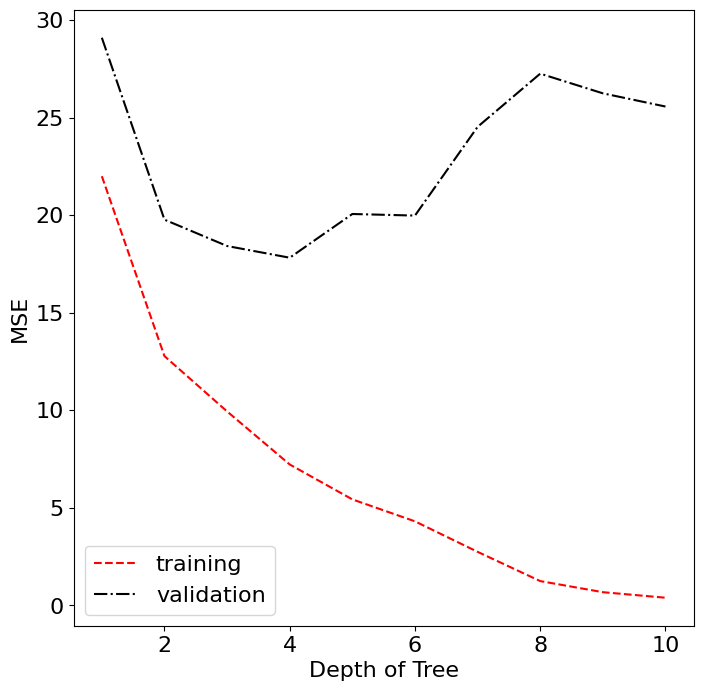

In [26]:
# Tamplikan error training & valid
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(depth_list, mse_training_list, "--r", label="training")
ax.plot(depth_list, mse_valid_list, "-.k", label="validation")


ax.set_xlabel("Depth of Tree")
ax.set_ylabel("MSE")
plt.legend()
plt.show()

---
## Cross Validation Set Approach

- Bagi data seimbang ke dalam k-fold
- Dilakukan tanpa pengembalian

In [27]:
# Idenya, 
# 1. acak ulang susunan data
# 2. bagi fold berdasarkan p urutan pertama

In [28]:
# Acak data pakai np.random.permutation
p_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(5):
    print(np.random.permutation(p_))

[ 6  7  8 10  3  5  9  2  1  4]
[ 5  1  9  6  3  2  8  7  4 10]
[ 5  7  8  1  9  2  4 10  6  3]
[ 6  2  4 10  3  8  5  7  9  1]
[ 7  3  9  5  8  6  4  2 10  1]


In [29]:
new_auto_data = auto_data.reindex(np.random.permutation(auto_data.index))
new_auto_data.head()

,displacement,horsepower,weight,mpg
96,225.0,105.0,3121.0,18.0
233,97.0,75.0,2265.0,26.0
319,108.0,75.0,2265.0,32.2
228,350.0,170.0,4165.0,15.5
63,318.0,150.0,4135.0,15.0


In [30]:
auto_data.head()

,displacement,horsepower,weight,mpg
0,307.0,130.0,3504.0,18.0
1,350.0,165.0,3693.0,15.0
2,318.0,150.0,3436.0,18.0
3,304.0,150.0,3433.0,16.0
4,302.0,140.0,3449.0,17.0


In [31]:
# Reset index
new_auto_data = new_auto_data.reset_index(drop = True)
new_auto_data.head()

,displacement,horsepower,weight,mpg
0,225.0,105.0,3121.0,18.0
1,97.0,75.0,2265.0,26.0
2,108.0,75.0,2265.0,32.2
3,350.0,170.0,4165.0,15.5
4,318.0,150.0,4135.0,15.0


In [32]:
# Selanjutnya bagi data per fold.
# Misal dibagi jadi 5 fold
n_data = len(new_auto_data)
n_fold = 5
n_sample_in_fold = int(n_data / n_fold)
print(n_sample_in_fold)

78


In [33]:
data_fold_list = []
for i in range(n_fold):
    index_start = i*n_sample_in_fold + i
    index_end = index_start + n_sample_in_fold - 1

    fold_data_i = new_auto_data.loc[index_start:index_end]
    data_fold_list.append(fold_data_i)

print(data_fold_list)

[    displacement  horsepower  weight   mpg
0          225.0       105.0  3121.0  18.0
1           97.0        75.0  2265.0  26.0
2          108.0        75.0  2265.0  32.2
3          350.0       170.0  4165.0  15.5
4          318.0       150.0  4135.0  15.0
..           ...         ...     ...   ...
73         140.0        88.0  2870.0  26.4
74         262.0        85.0  3015.0  38.0
75         250.0        78.0  3574.0  18.0
76         146.0        67.0  3250.0  30.0
77         455.0       225.0  3086.0  14.0

[78 rows x 4 columns],      displacement  horsepower  weight   mpg
79          110.0        87.0  2672.0  25.0
80           97.0        67.0  2065.0  32.3
81           90.0        71.0  2223.0  25.0
82           86.0        65.0  2110.0  46.6
83           98.0        80.0  1915.0  35.7
..            ...         ...     ...   ...
152         200.0        88.0  3060.0  20.2
153         156.0        92.0  2620.0  25.8
154          91.0        69.0  2130.0  37.3
155         383.0  

In [34]:
fold_ = 2
data_valid = data_fold_list[fold_-1]
data_valid.head()

,displacement,horsepower,weight,mpg
79,110.0,87.0,2672.0,25.0
80,97.0,67.0,2065.0,32.3
81,90.0,71.0,2223.0,25.0
82,86.0,65.0,2110.0,46.6
83,98.0,80.0,1915.0,35.7


In [35]:
data_to_concat = []
for i in range(n_fold):
    if fold_-1 != i:
        data_to_concat.append(data_fold_list[i])

data_train = pd.concat(data_to_concat)
data_train.head()

,displacement,horsepower,weight,mpg
0,225.0,105.0,3121.0,18.0
1,97.0,75.0,2265.0,26.0
2,108.0,75.0,2265.0,32.2
3,350.0,170.0,4165.0,15.5
4,318.0,150.0,4135.0,15.0


In [36]:
# buat generator data training & validation
def generate_train_valid(data, fold):
    """
    Fungsi untuk generate data training & validation dari list folded data
    :param data: <list> list data tiap fold
    :param fold: <int> fold yang ingin dijadikan data validasi
    :return data_train: <pandas dataframe> sampel data training
    :return data_valid: <pandas dataframe> sampel data validation
    """
    # 1. Buat data validasi
    data_valid = data[fold-1]

    # 2. Buat data training
    n_fold = len(data)
    data_to_concat = []
    for i in range(n_fold):
        if fold-1 != i:
            data_to_concat.append(data[i])

    data_train = pd.concat(data_to_concat)

    return data_train, data_valid

In [37]:
data_train, data_valid = generate_train_valid(data = data_fold_list,
                                              fold = 4)

data_train.head()

,displacement,horsepower,weight,mpg
0,225.0,105.0,3121.0,18.0
1,97.0,75.0,2265.0,26.0
2,108.0,75.0,2265.0,32.2
3,350.0,170.0,4165.0,15.5
4,318.0,150.0,4135.0,15.0


In [38]:
print(data_valid.head())
data_valid.shape

     displacement  horsepower  weight   mpg
237         302.0       140.0  4294.0  13.0
238         400.0       190.0  4422.0  13.0
239          98.0        68.0  2045.0  31.5
240         119.0       100.0  2615.0  32.9
241         200.0        85.0  3070.0  20.8


(78, 4)

In [39]:
data_valid.tail()

,displacement,horsepower,weight,mpg
310,302.0,140.0,3449.0,17.0
311,318.0,150.0,4457.0,14.0
312,122.0,86.0,2226.0,21.0
313,91.0,67.0,1995.0,38.0
314,121.0,110.0,2660.0,24.0


---
**Lakukan eksperimen 1**
- Model: Decision Tree Regressor
- depth of tree: variasi 1-10

In [40]:
depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fold_list = [1, 2, 3, 4, 5]
mse_training_list = []
mse_valid_list = []

for k in range(len(depth_list)):
    mse_training_fold = []
    mse_valid_fold = []

    for i in range(len(fold_list)):
        # 1. Buat data train & valid        
        current_fold = i+1
        data_train, data_valid = generate_train_valid(data = data_fold_list, 
                                                      fold = current_fold)
        
        # 2. Pisahkan X & y
        # Split training data
        X_train, y_train = split_X_y(data = data_train,
                                    target_column = "mpg")

        # Split validation data
        X_valid, y_valid = split_X_y(data = data_valid,
                                    target_column = "mpg")
        
        # 3. Fit model
        regressor = DecisionTreeRegressor(max_depth = depth_list[k])
        
        regressor.fit(X = X_train,
                      y = y_train)

        # 4. Buat prediksi
        pred_training = regressor.predict(X_train)
        pred_validation = regressor.predict(X_valid)

        # 5. Hitung mse di training & validation
        mse_training = mean_squared_error(y_true = y_train,
                                        y_pred = pred_training)
    
        mse_validation = mean_squared_error(y_true = y_valid,
                                            y_pred = pred_validation)
        
        # 6. masukkan semua nilai mse training & validation ke dalam penyimpanan fold
        mse_training_fold.append(mse_training)
        mse_valid_fold.append(mse_validation)
    
    # 7. Cari rata-rata fold untuk setiap eksperimen
    mse_training_eks = np.mean(mse_training_fold)
    mse_valid_eks = np.mean(mse_valid_fold)
    
    # 8. masukkan ke list
    mse_training_list.append(mse_training_eks)
    mse_valid_list.append(mse_valid_eks)


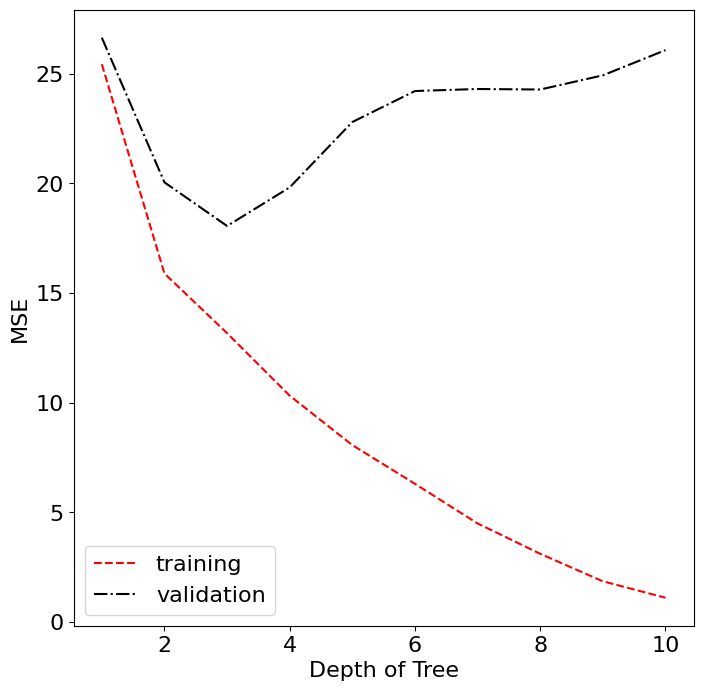

In [41]:
# Tamplikan error training & valid
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(depth_list, mse_training_list, "--r", label="training")
ax.plot(depth_list, mse_valid_list, "-.k", label="validation")


ax.set_xlabel("Depth of Tree")
ax.set_ylabel("MSE")
plt.legend()
plt.show()

---
## Bootstrap Approach

- Resampling n data 
- Sample yang sudah terpilih dapat diambil kembali (with replacement)

In [42]:
# Buat data yang ingin di-sampling
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = (2*x + 3)**2

data = pd.DataFrame({"x": x,
                     "y": y})

data

,x,y
0,1,25
1,2,49
2,3,81
3,4,121
4,5,169
5,6,225
6,7,289
7,8,361
8,9,441
9,10,529


In [43]:
# Lakukan sampling sederhana
# Sampling DENGAN pengembalian
n_sample = 5
data.sample(n = n_sample,
            replace = True)

,x,y
2,3,81
2,3,81
6,7,289
2,3,81
3,4,121


In [44]:
# Lakukan 10 sampling
for i in range(10):
    data_sample = data.sample(n = len(data), replace = True)
    index_data_sample = data_sample.index.to_list()

    print(f"Index sample ke-{i+1} : {index_data_sample}")

Index sample ke-1 : [9, 4, 3, 4, 9, 2, 8, 1, 0, 3]
Index sample ke-2 : [0, 6, 7, 2, 3, 6, 8, 6, 9, 7]
Index sample ke-3 : [4, 3, 1, 9, 4, 0, 3, 6, 0, 7]
Index sample ke-4 : [5, 8, 4, 5, 4, 5, 7, 6, 7, 9]
Index sample ke-5 : [7, 8, 3, 1, 1, 1, 2, 3, 1, 7]
Index sample ke-6 : [2, 9, 8, 7, 3, 4, 5, 3, 7, 9]
Index sample ke-7 : [6, 6, 5, 0, 6, 2, 9, 5, 2, 6]
Index sample ke-8 : [3, 0, 3, 0, 4, 4, 7, 4, 1, 9]
Index sample ke-9 : [7, 3, 3, 2, 7, 8, 2, 2, 5, 4]
Index sample ke-10 : [3, 9, 5, 8, 6, 9, 7, 2, 5, 2]


In [45]:
# Buat fungsi
def bootstrap_sampling(data, n_sample):
    """
    Fungsi untuk buat bootstrap sampling
    :param data: <pandas dataframe> sampel data
    :param n_sample: <int> jumlah bootstrap sample
    :return list_data: <list> kumpulan bootstrap sample
    """
    list_data = []
    for i in range(n_sample):
        data_sample = data.sample(n = len(data),
                                  replace = True)
        
        list_data.append(data_sample)

    return list_data
    

In [46]:
list_data = bootstrap_sampling(data = data,
                               n_sample = 5)

list_data

[    x    y
 9  10  529
 6   7  289
 3   4  121
 2   3   81
 8   9  441
 8   9  441
 5   6  225
 3   4  121
 8   9  441
 7   8  361,
     x    y
 4   5  169
 9  10  529
 7   8  361
 7   8  361
 5   6  225
 7   8  361
 3   4  121
 8   9  441
 9  10  529
 5   6  225,
     x    y
 0   1   25
 2   3   81
 9  10  529
 6   7  289
 4   5  169
 9  10  529
 4   5  169
 6   7  289
 0   1   25
 0   1   25,
     x    y
 9  10  529
 7   8  361
 9  10  529
 4   5  169
 5   6  225
 1   2   49
 9  10  529
 8   9  441
 8   9  441
 0   1   25,
    x    y
 2  3   81
 0  1   25
 1  2   49
 1  2   49
 1  2   49
 6  7  289
 6  7  289
 7  8  361
 7  8  361
 5  6  225]

In [47]:
auto_data.head()

,displacement,horsepower,weight,mpg
0,307.0,130.0,3504.0,18.0
1,350.0,165.0,3693.0,15.0
2,318.0,150.0,3436.0,18.0
3,304.0,150.0,3433.0,16.0
4,302.0,140.0,3449.0,17.0


In [48]:
n_sample = 5
list_auto_data = bootstrap_sampling(data = auto_data,
                                    n_sample = n_sample)

Prediksi pakai Linear Regression, agar dapat koefisiennya

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
X_train, y_train = split_X_y(data = list_auto_data[0],
                             target_column = "mpg")

In [51]:
# Fit model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Tampilkan coefficient & intercept
print(regressor.coef_)
print(regressor.intercept_)

[ 0.0079232  -0.07464521 -0.00615432]
48.38124386289272


Untuk bootstrap sample lainnya

In [52]:
X_train, y_train = split_X_y(data = list_auto_data[1],
                             target_column = "mpg")

# Fit model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Tampilkan coefficient & intercept
print(regressor.coef_)
print(regressor.intercept_)

[-0.00983129 -0.04007225 -0.00504103]
44.640695181652745


---
**Lakukan eksperimen 1**
- Model: Linear
- n_sample: 101

In [53]:
n_sample = 1001
list_auto_data = bootstrap_sampling(data = auto_data,
                                    n_sample = n_sample)

In [54]:
coef_list = []
intercept_list = []
mse_list = []

for i in range(n_sample):
    data_train = list_auto_data[i]

    # 1. Pisahkan X_train & y_train
    X_train, y_train = split_X_y(data = data_train,
                                 target_column = "mpg")
    
    # 2. Fit model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # 3. Buat prediksi
    pred_training = regressor.predict(X_train)

    # 4. Hitung mse di training & validation
    mse_training = mean_squared_error(y_true = y_train,
                                      y_pred = pred_training)
     
    # masukkan ke list
    mse_list.append(mse_training)
    coef_list.append(regressor.coef_)
    intercept_list.append(regressor.intercept_)

mse_list = np.array(mse_list)
coef_list = np.array(coef_list)
intercept_list = np.array(intercept_list)


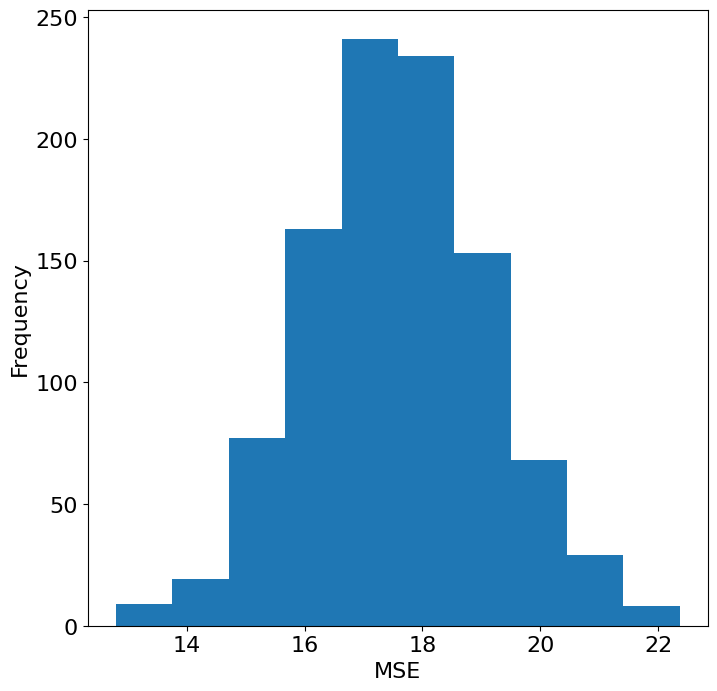

In [55]:
# Tamplikan error uncertainty
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.hist(mse_list)

ax.set_xlabel("MSE")
ax.set_ylabel("Frequency")
plt.show()

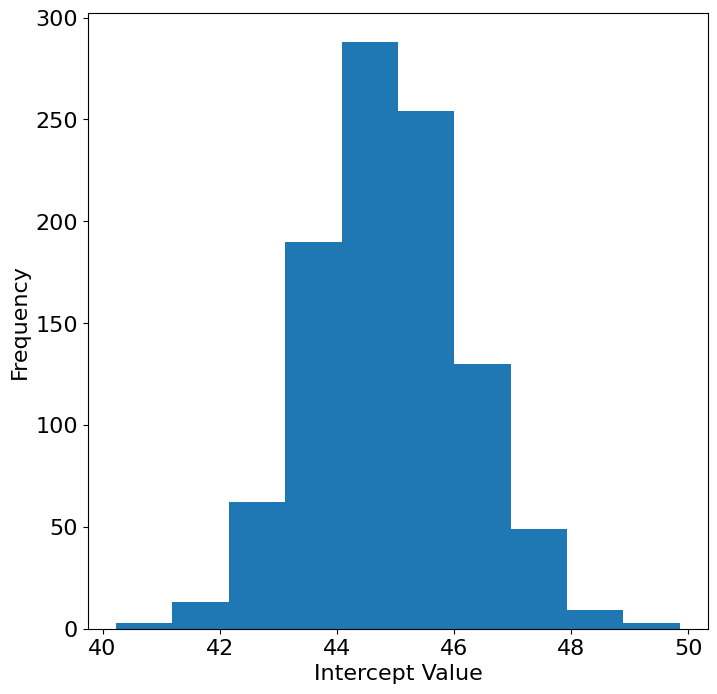

In [56]:
# Tamplikan intercept uncertainty
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.hist(intercept_list)

ax.set_xlabel("Intercept Value")
ax.set_ylabel("Frequency")
plt.show()

In [57]:
auto_data.head()

,displacement,horsepower,weight,mpg
0,307.0,130.0,3504.0,18.0
1,350.0,165.0,3693.0,15.0
2,318.0,150.0,3436.0,18.0
3,304.0,150.0,3433.0,16.0
4,302.0,140.0,3449.0,17.0


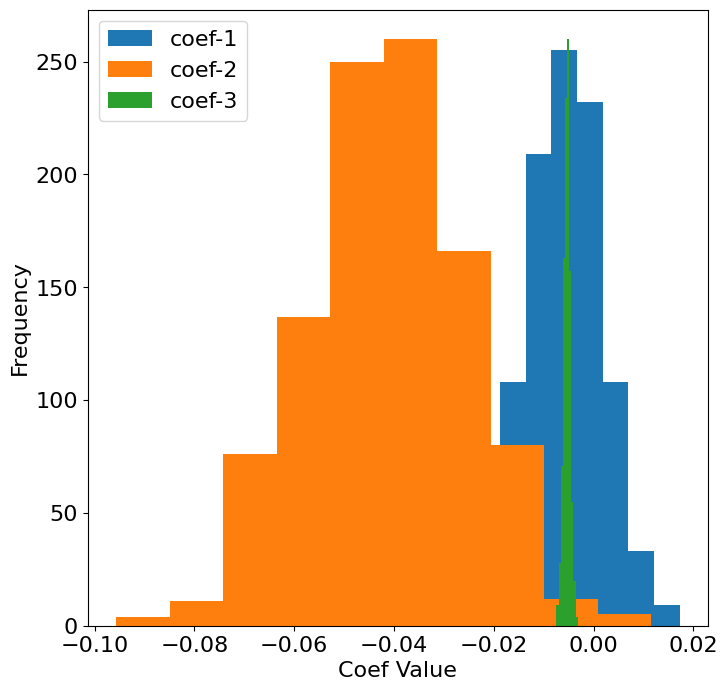

In [58]:
# Tamplikan salah satu koefisien
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.hist(coef_list[:,0], label="coef-1")
ax.hist(coef_list[:,1], label="coef-2")
ax.hist(coef_list[:,2], label="coef-3")

ax.set_xlabel("Coef Value")
ax.set_ylabel("Frequency")
plt.legend()
plt.show()

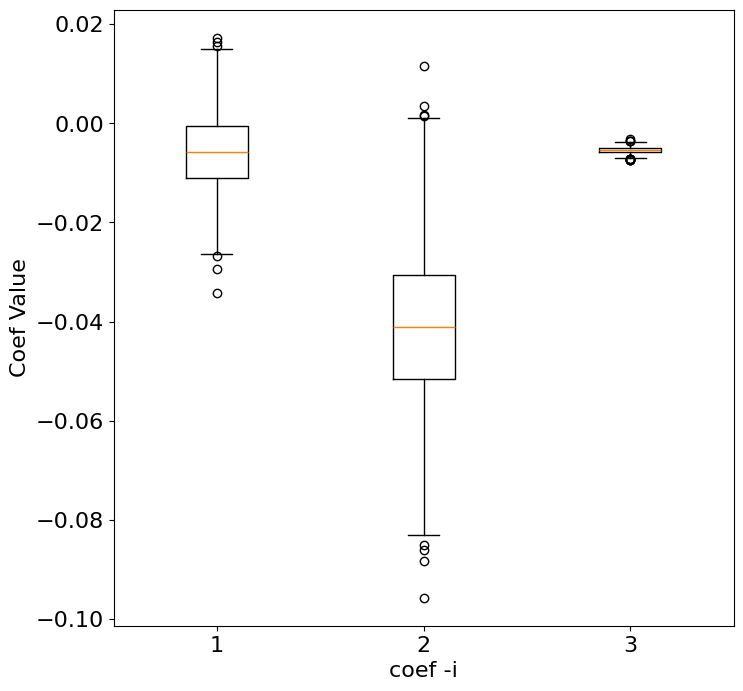

In [59]:
# Tamplikan salah satu koefisien
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.boxplot(coef_list)

ax.set_xlabel("coef -i")
ax.set_ylabel("Coef Value")
plt.show()